In [6]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

(506, 13)


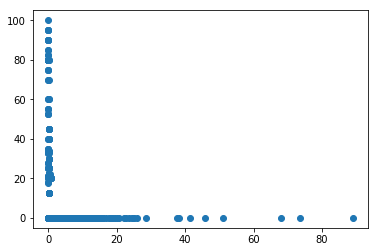

In [19]:
X, y = load_boston(return_X_y= True)
print(X.shape)
plt.scatter(X[:,0],X[:,1])

Data split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Random Forest Regressor

# Logistic Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=35,random_state=0)
rfr.fit(X_train,y_train)
print('score train set',(rfr.score(X_train,y_train)))
print('score test set',(rfr.score(X_test,y_test)))

score train set 0.979529027617053
score test set 0.8133423758710093


In [23]:
def print_score(algo,X_train,y_train,X_test,y_test):
    rfr.fit(X_train,y_train)
    print('score train set',(rfr.score(X_train,y_train)))
    print('score test set',(rfr.score(X_test,y_test)))

## Use cross-validation 